In [7]:
import numpy as np
import soccerdata as sd
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
games = five38.read_games()

In [4]:
elo = sd.ClubElo()
current_elo = elo.read_by_date()
current_elo.head()

[10/26/22 08:52:42] INFO     Saving cached data to /Users/selbl/soccerdata/data/ClubElo               ]8;id=275976;file:///Users/selbl/opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=154045;file:///Users/selbl/opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py#89\89]8;;\

,rank,country,level,elo,from,to,league
team,,,,,,,
Man City,1.0,ENG,1,2037.803833,2022-10-26,2022-10-29,ENG-Premier League
Real Madrid,2.0,ESP,1,2001.127319,2022-10-26,2022-10-30,ESP-La Liga
Liverpool,3.0,ENG,1,1984.683105,2022-10-23,2022-10-26,ENG-Premier League
Bayern,4.0,GER,1,1970.814697,2022-10-23,2022-10-26,GER-Bundesliga
Arsenal,5.0,ENG,1,1911.506714,2022-10-24,2022-10-27,ENG-Premier League


In [59]:
season_list = [str(i) for i in range(2016,2020)]
five38 = sd.FiveThirtyEight('ENG-Premier League', season_list)
games = five38.read_games()

[10/26/22 09:18:53] INFO     Saving cached data to /Users/selbl/soccerdata/data/FiveThirtyEight       ]8;id=113084;file:///Users/selbl/opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=92030;file:///Users/selbl/opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py#89\89]8;;\

In [60]:
GameDates = list(games['date'].values)

In [61]:
GameDates = pd.to_datetime(GameDates)

In [64]:
#i = 0
current_elo = elo.read_by_date(i)
#print(current_elo)

In [65]:
current_elo = elo.read_by_date(pd.to_datetime(list(games['date'].values)[0]).date())
#print(current_elo.index)
#current_elo[current_elo['league'] == 'ENG-Premier League']

In [66]:
current_elo.loc['Norwich']

rank                       NaN
country                    ENG
level                        2
elo                1593.605469
from       2016-08-07 00:00:00
to         2016-08-13 00:00:00
league                     NaN
Name: Norwich, dtype: object

In [98]:
#Function, input date, home and away team, 
#output elo in a dictionary and in that order
def elo_retriever(date,home_team,away_team):
    #query for current elo
    #current_elo = elo.read_by_date(pd.to_datetime(list(games['date'].values)[0]).date())
    current_elo = elo.read_by_date(date)
    #Try and check if the team is in the wrong name list
    name_dict = {'Norwich City':'Norwich','AFC Bournemouth':'Bournemouth','Tottenham Hotspur':'Tottenham','Brighton and Hove Albion':'Brighton', 'West Ham United':'West Ham','Manchester City':'Man City','Leicester City':'Leicester','Wolverhampton':'Wolves','Manchester United':'Man United','Swansea City':'Swansea','West Bromwich Albion':'West Brom','Hull City':'Hull','Stoke City':'Stoke','Huddersfield Town':'Huddersfield','Cardiff City':'Cardiff'}
    if home_team in name_dict.keys():
        home_team = name_dict[home_team]
    if away_team in name_dict.keys():
        away_team = name_dict[away_team]
    #adapt to situation
    home_elo = current_elo.loc[home_team]['elo']
    away_elo = current_elo.loc[away_team]['elo']
    #elos list
    elo_dict = {'home_team':home_elo,'away_team':away_elo}
    return elo_dict

In [39]:
games['date'].dt.date

datetime.date(2019, 8, 9)

In [68]:
#function receives date, home team and away team and retrieves classificaiton (who won and so forth)
def result_match(date_calendar,home_team,away_team):
    #re-write date
    home_score = games[(games['date'].dt.date == date_calendar ) & (games['away_team'] == away_team) & (games['home_team'] == home_team)]['score_home']
    away_score = games[(games['date'].dt.date == date_calendar ) & (games['away_team'] == away_team) & (games['home_team'] == home_team)]['score_away']
    #compute difference
    dif = home_score - away_score
    dif = dif.values[0]
    #by default, result is draw
    res = 'D'
    if dif > 0:
        res = 'W'
    elif dif < 0:
        res = 'L'
    return res

In [15]:
home_score = games[(games['date'] == '2019-08-09T19:00:00.000000000') & (games['home_team'] == 'Liverpool')]['score_home']
away_score = games[(games['date'] == '2019-08-09T19:00:00.000000000') & (games['home_team'] == 'Liverpool')]['score_away']
dif = home_score - away_score
dif.values[0] > 0

True

In [69]:
GameDates = list(games['date'].values)
GameDates = pd.to_datetime(GameDates)
#print(GameDates)

In [70]:
GameTeamHome = list(games['home_team'].values)
GameTeamAway = list(games['away_team'].values)
#print(GameTeamHome)
#print(GameTeamAway)

In [ ]:
#Now,we have everything needed, we iterate over each element and afterwards we append everything in a dictionary
home_elos = []
away_elos = []
result = []
for i in range(0,len(GameDates)):
    date_i = GameDates[i]
    date_2_i = date_i.date()
    home_i = GameTeamHome[i]
    away_i = GameTeamAway[i]
    elo_i = elo_retriever(date_i,home_i,away_i)
    home_elos.append(elo_i['home_team'])
    away_elos.append(elo_i['away_team'])
    result.append(result_match(date_2_i,home_i,away_i))

2019-08-10 14:00:00
2016-08-13 14:00:00
2016-08-13 14:00:00
2016-08-13 14:00:00
2016-08-13 11:30:00
2016-08-13 16:30:00
2016-08-13 14:00:00
2016-08-13 14:00:00
2016-08-14 12:30:00
2016-08-14 15:00:00
2016-08-15 19:00:00
2016-08-19 19:00:00
2016-08-20 14:00:00
2016-08-20 16:30:00
2016-08-20 11:30:00
2016-08-20 14:00:00
2016-08-20 14:00:00
2016-08-20 14:00:00
2016-08-20 14:00:00
2016-08-21 12:30:00
2016-08-21 15:00:00
2016-08-27 14:00:00
2016-08-27 14:00:00
2016-08-27 14:00:00
2016-08-27 16:30:00
2016-08-27 14:00:00
2016-08-27 14:00:00
2016-08-27 11:30:00
2016-08-27 14:00:00
2016-08-28 15:00:00
2016-08-28 12:30:00
2016-09-10 14:00:00
2016-09-10 14:00:00
2016-09-10 14:00:00
2016-09-10 16:30:00
2016-09-10 11:30:00
2016-09-10 14:00:00
2016-09-10 14:00:00
2016-09-10 14:00:00
2016-09-11 15:00:00
2016-09-12 19:00:00
2016-09-16 19:00:00
2016-09-17 16:30:00
2016-09-17 14:00:00
2016-09-17 14:00:00
2016-09-17 14:00:00
2016-09-17 14:00:00
2016-09-18 13:15:00
2016-09-18 13:15:00
2016-09-18 15:30:00


2017-08-27 15:00:00
2017-08-27 12:30:00
2017-09-09 14:00:00
2017-09-09 14:00:00
2017-09-09 14:00:00
2017-09-09 14:00:00
2017-09-09 11:30:00
2017-09-09 14:00:00
2017-09-09 16:30:00
2017-09-10 12:30:00
2017-09-10 15:00:00
2017-09-11 19:00:00
2017-09-15 19:00:00
2017-09-16 11:30:00
2017-09-16 14:00:00
2017-09-16 14:00:00
2017-09-16 14:00:00
2017-09-16 16:30:00
2017-09-16 14:00:00
2017-09-16 14:00:00
2017-09-17 12:30:00
2017-09-17 15:00:00
2017-09-23 14:00:00
2017-09-23 14:00:00
2017-09-23 16:30:00
2017-09-23 14:00:00
2017-09-23 14:00:00
2017-09-23 14:00:00
2017-09-23 14:00:00
2017-09-23 11:30:00
2017-09-24 15:00:00
2017-09-25 19:00:00
2017-09-30 14:00:00
2017-09-30 16:30:00
2017-09-30 11:30:00
2017-09-30 14:00:00
2017-09-30 14:00:00
2017-09-30 14:00:00
2017-09-30 14:00:00
2017-10-01 11:00:00
2017-10-01 13:15:00
2017-10-01 15:30:00
2017-10-14 14:00:00
2017-10-14 14:00:00
2017-10-14 11:30:00
2017-10-14 14:00:00
2017-10-14 14:00:00
2017-10-14 14:00:00
2017-10-14 16:30:00
2017-10-15 12:30:00


2018-09-22 14:00:00
2018-09-23 15:00:00
2018-09-23 12:30:00
2018-09-29 14:00:00
2018-09-29 16:30:00
2018-09-29 14:00:00
2018-09-29 14:00:00
2018-09-29 14:00:00
2018-09-29 14:00:00
2018-09-29 11:30:00
2018-09-29 14:00:00
2018-09-30 15:00:00
2018-10-01 19:00:00
2018-10-05 19:00:00
2018-10-06 14:00:00
2018-10-06 14:00:00
2018-10-06 14:00:00
2018-10-06 16:30:00
2018-10-06 14:00:00
2018-10-06 14:00:00
2018-10-07 11:00:00
2018-10-07 15:30:00
2018-10-07 13:15:00
2018-10-20 14:00:00
2018-10-20 14:00:00
2018-10-20 11:30:00
2018-10-20 16:30:00
2018-10-20 14:00:00
2018-10-20 14:00:00
2018-10-20 14:00:00
2018-10-20 14:00:00


In [44]:
print(result)

['W', 'D', 'W', 'D', 'W', 'L', 'L', 'D', 'W', 'L', 'W', 'L', 'D', 'W', 'D', 'W', 'L', 'D', 'W', 'D', 'W', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'D', 'L', 'D', 'W', 'W', 'W', 'D', 'D', 'W', 'D', 'W', 'D', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'D', 'D', 'L', 'W', 'L', 'W', 'W', 'D', 'W', 'L', 'D', 'W', 'D', 'D', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'D', 'W', 'W', 'W', 'L', 'D', 'L', 'W', 'L', 'W', 'L', 'D', 'W', 'W', 'L', 'W', 'W', 'D', 'D', 'D', 'W', 'L', 'W', 'L', 'W', 'D', 'D', 'D', 'W', 'D', 'L', 'W', 'D', 'L', 'W', 'W', 'W', 'L', 'L', 'L', 'D', 'L', 'W', 'W', 'W', 'W', 'L', 'D', 'W', 'W', 'W', 'L', 'D', 'L', 'L', 'L', 'W', 'L', 'L', 'D', 'W', 'L', 'L', 'W', 'D', 'W', 'W', 'W', 'D', 'D', 'D', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'L', 'L', 'W', 'L', 'W', 'D', 'L', 'D', 'W', 'L', 'L', 'W', 'L', 'D', 'W', 'W', 'L', 'L', 'D', 'L', 'D', 'L', 'L', 'L', 'D', 'W', 'W', 'L', 'L', 'W', 'D', 'W', 'L', 'W', 'W', 'L', 'W', 'D', 'W', 'W', 'W', 'L', 'L', 'D', 'D', 'W', 'L', 'L', 'W', 'W', 'W',

In [20]:
EloDiff = np.abs(np.array(home_elos) - np.array(away_elos))
EloAvg = np.mean([np.array(home_elos),np.array(away_elos)],axis = 0)

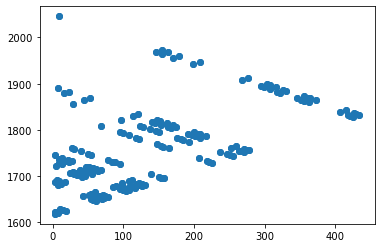

In [21]:
plt.scatter(EloDiff, EloAvg)

In [96]:
current_elo = elo.read_by_date(date_i).country
current_elo = current_elo[current_elo == 'ENG']
print(current_elo)


team
Liverpool           ENG
Man City            ENG
Tottenham           ENG
Chelsea             ENG
Arsenal             ENG
Man United          ENG
Everton             ENG
Crystal Palace      ENG
Leicester           ENG
West Ham            ENG
Wolves              ENG
Newcastle           ENG
Bournemouth         ENG
Watford             ENG
Burnley             ENG
Southampton         ENG
Norwich             ENG
Sheffield United    ENG
Brighton            ENG
West Brom           ENG
Aston Villa         ENG
Cardiff             ENG
Derby               ENG
Fulham              ENG
Leeds               ENG
Swansea             ENG
Middlesbrough       ENG
Sheffield Weds      ENG
Brentford           ENG
Bristol City        ENG
Huddersfield        ENG
Stoke               ENG
Birmingham          ENG
Preston             ENG
Hull                ENG
Forest              ENG
Wigan               ENG
Millwall            ENG
Blackburn           ENG
QPR                 ENG
Reading             ENG
Charlton   